# Cluster by density peaks - paper figure examples

This notebook demonstrates the clustering by density peaks algorithm on synthetic datasets that are based on the published paper. The algorithm is based on the method proposed by Rodriguez and Laio in “Clustering by Fast Search and Find of Density Peaks” (https://www.science.org/doi/10.1126/science.1242072)

## Imports

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import densitypeakclustering as dc

## Figure 1

### Load and display the raw data

In [2]:
# Load data into two vectores with the x and y coordinates of data points
x = []
y = []
with open('fig1.dat') as f:
    for line in f:
        data = line.split()
        x.append(float(data[1]))
        y.append(float(data[2]))
x = np.array(x)
y = np.array(y)
x = (x-0.708)/154.567
y = np.abs(((y-1.133)/106.885) - 1)
x = x * ((154.567-0.708)/(106.885-1.133))

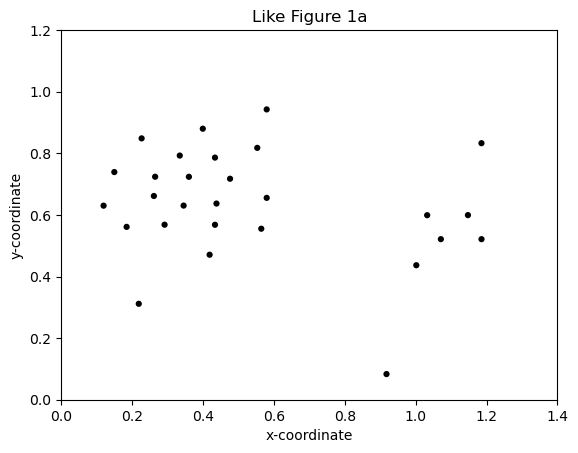

In [3]:
# Show the plain data, similar to figure 1a
plt.scatter( x, y, c="#000000", s=20, alpha=1.0, edgecolors="None" )
plt.xlim(0,1.4)
plt.ylim(0,1.2)
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.title("Like Figure 1a");

### Density peak clustering on figure 1 data

In [4]:
# Settings
d_c = 0.2
rho_min = 2
delta_min = 0.2
colors = ["#00FF00","#0000FF"]

In [5]:
# Create data matrix
X = np.stack((x,y),axis=1)

# Calculate distance matrix
D = dc.distance_matrix(X)

# Calculate the local density
rho = dc.local_density(D, d_c)

# Calculate the minimum distance to a point with higher density
delta,nearest = dc.distance_to_larger_density(D, rho)

Calculating pairwise distance matrix for 28 samples


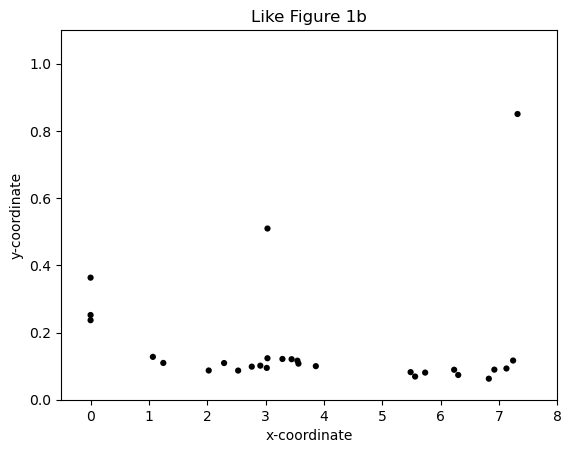

In [6]:
# Show 'rho' and 'delta', similar to figure 1b
plt.scatter( rho, delta, c="#000000", s=20, alpha=1.0, edgecolors="None" )
plt.xlim(-0.5,8)
plt.ylim(0,1.1)
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.title("Like Figure 1b");

### Identify clusters to replot data

In [7]:
# Find the cluster centers
centers = dc.cluster_centers(rho, delta, rho_min=rho_min, delta_min=delta_min)

# Assign cluster ID's to all datapoints
ids = dc.assign_cluster_id(rho, nearest, centers)

# Identify the data that belongs with the cluster cores
core = dc.cluster_cores(D, d_c, rho, ids)

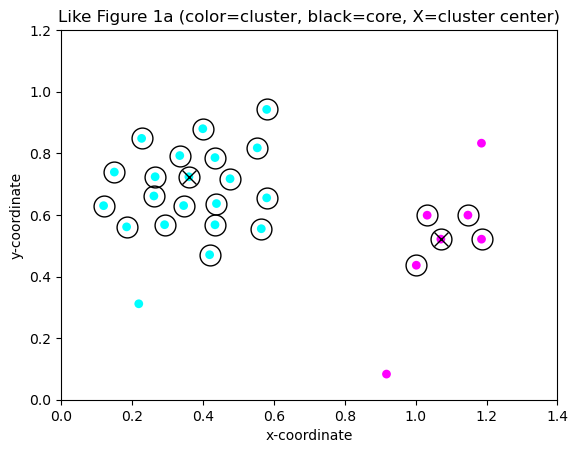

In [8]:
# Show the plain data, similar to figure 1a
plt.scatter( x, y, c=ids, s=40, alpha=1.0, cmap="cool", edgecolors="None" )
plt.plot( x[core==True], y[core==True], "o", markersize=15, markerfacecolor="None", markeredgecolor="#000000" )
plt.plot( x[centers], y[centers], "x", markersize=10, markerfacecolor="None", markeredgecolor="#000000" )
plt.xlim(0,1.4)
plt.ylim(0,1.2)
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.title("Like Figure 1a (color=cluster, black=core, X=cluster center)");

In [9]:
# Run all in one go, the fraction of 0.2271 gives roughly a d_c of 0.2
clusters = dc.find_clusters(X, fraction=0.2271, rho_min=rho_min, delta_min=delta_min, normalize=False, quiet=True)

# Loop over clusters display cluster information
for nr,c in enumerate(clusters):
    print(f'{nr}) X={c["X"]}, y={c["Y"]}, rho={c["rho"]}, delta={c["delta"]}')

0) X=0.359859685452173, y=0.7237872479767975, rho=7.319776240249006, delta=0.850369365536879
1) X=1.071069910489323, y=0.5213734387425739, rho=3.03237648993088, delta=0.5095539164604014


## Figure 2b

In [10]:
# Load data
x = []
y = []
with open('fig2_panelB.dat') as f:
    for line in f:
        data = line.split()
        x.append(float(data[0]))
        y.append(float(data[1]))
x = np.array(x)
y = np.array(y)

# Create data matrix X (samples x features)
X = np.stack((x,y),axis=1)

In [11]:
# Make a nice colormap for clusterID
set1_colormap = matplotlib.colormaps.get_cmap('Set1')
clust_colors = []
for i in range(5):
    clust_colors.append(set1_colormap(i/5))

In [12]:
# Settings for clustering
rho_min = 2
delta_min = 0.2
fraction = 0.05

# Calculate d_c, rho, delta, centers, ids and core
D = dc.distance_matrix(X)
d_c = dc.estimate_d_c(D,fraction)
print(f'{d_c = }')
rho = dc.local_density(D, d_c)
delta, nearest = dc.distance_to_larger_density(D, rho)
centers = dc.cluster_centers(rho, delta, rho_min=rho_min, delta_min=delta_min)
ids = dc.assign_cluster_id(rho, nearest, centers)
core = dc.cluster_cores(D, d_c, rho, ids)

Calculating pairwise distance matrix for 4000 samples
d_c = 0.0573171704524028


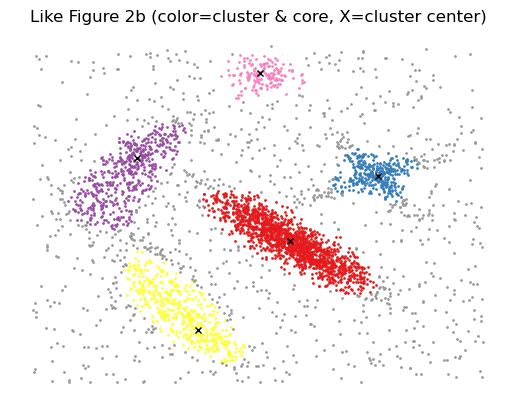

In [13]:
# Show the labeled data
for p in range(len(ids)):
    if core[p]:
        plt.plot(x[p],y[p],marker="o",markersize=2,mfc=clust_colors[ids[p]],mec="None")
    else:
        plt.plot(x[p],y[p],marker="o",markersize=2,mfc="#999999",mec="None")
for p in centers:
    plt.plot(x[p],y[p],marker="x",markersize=5,mfc="None",mec="#000000")

plt.axis("off")
plt.title("Like Figure 2b (color=cluster & core, X=cluster center)");

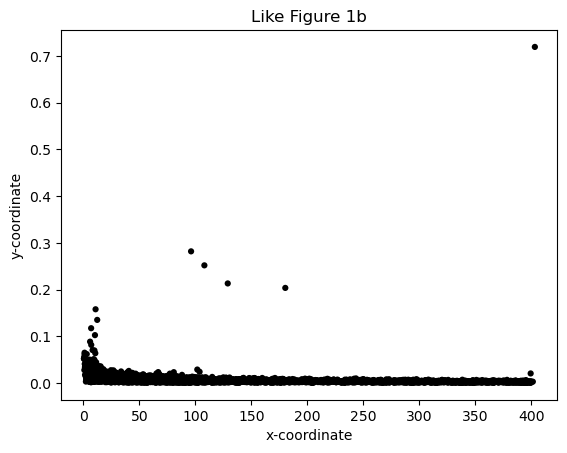

In [14]:
# Show 'rho' and 'delta', similar to figure 2d
plt.scatter( rho, delta, c="#000000", s=20, alpha=1.0, edgecolors="None" )
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.title("Like Figure 1b");

## Figure 2c

In [15]:
# Load data
x = []
y = []
with open('fig2_panelC.dat') as f:
    for line in f:
        data = line.split()
        x.append(float(data[0]))
        y.append(float(data[1]))
x = np.array(x)
y = np.array(y)

# Create data matrix X (samples x features)
X = np.stack((x,y),axis=1)

In [20]:
# Make a nice colormap for clusterID
set1_colormap = matplotlib.colormaps.get_cmap('Set1')
clust_colors = []
for i in range(5):
    clust_colors.append(set1_colormap(i/5))

In [17]:
# Settings for clustering
rho_min = 10
delta_min = 0.2
fraction = 0.03

# Calculate d_c, rho, delta, centers, ids and core
D = dc.distance_matrix(X)
d_c = dc.estimate_d_c(D,fraction)
rho = dc.local_density(D, d_c)
delta, nearest = dc.distance_to_larger_density(D, rho)
centers = dc.cluster_centers(rho, delta, rho_min=rho_min, delta_min=delta_min)
ids = dc.assign_cluster_id(rho, nearest, centers)
core = dc.cluster_cores(D, d_c, rho, ids)

Calculating pairwise distance matrix for 1000 samples


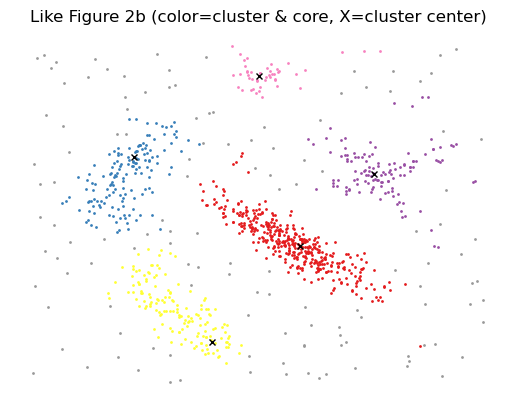

In [18]:
# Show the labeled data
for p in range(len(ids)):
    if core[p]:
        plt.plot(x[p],y[p],marker="o",markersize=2,mfc=clust_colors[ids[p]],mec="None")
    else:
        plt.plot(x[p],y[p],marker="o",markersize=2,mfc="#999999",mec="None")
for p in centers:
    plt.plot(x[p],y[p],marker="x",markersize=5,mfc="None",mec="#000000")

plt.axis("off")
plt.title("Like Figure 2b (color=cluster & core, X=cluster center)");

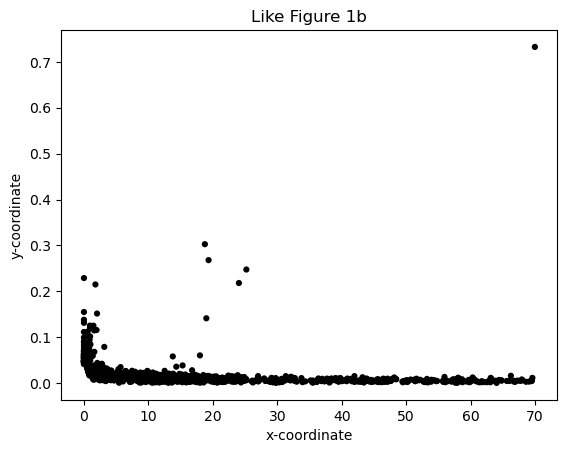

In [19]:
# Show 'rho' and 'delta', similar to figure 2d
plt.scatter( rho, delta, c="#000000", s=20, alpha=1.0, edgecolors="None" )
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.title("Like Figure 1b");